# Importar las librerias

In [1]:
import os #Nos permite realizar operaciones como crear carpeta, listas contenidos etc. 
import matplotlib.pyplot as plt #Permitirá visualizar las imágenes
from keras.models import Sequential #Keras para procesamiento de imagen
from keras.utils import to_categorical #Para categorizar variables
from tensorflow.keras import layers #Importación de librerias
import pathlib #manipular rutas de sistemas de archivos
import numpy as np # manejo de datos extremadamente rápido. 
import tensorflow as TF #crear gráficos de flujo de datos,
from sklearn import preprocessing  #proporciona varias funciones de utilidad comunes
#para realizar operaciones simples con imágenes como: Abrir y guardar imágenes.
#Dibujar formas simples en imágenes. Escribir en imágenes.
import cv2
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' #establecer variables de entorno
import shutil #Mueve de forma recursiva un archivo o directorio
import glob #devuelve una lista con las entradas 
#Pandas nos permite obtener columnas o filas de nuestros datos de forma muy fácil e intuitiva.
import pandas as pd
import seaborn as sn #visualización de datos para Python
#Procesamiento de imagenes
from tensorflow.keras.utils import img_to_array,  array_to_img, img_to_array, load_img 
#abrir, manipular y guardar muchos formatos de archivo de imagen diferentes.
from  PIL  import Image
#Romver el fondo
from rembg import remove
# procesamiento de imagen
from sklearn.preprocessing import MinMaxScaler
import h5py
from time import sleep
print("fdfdfdfd")

fdfdfdfd


# Leer las clases del dataset (Cargar Dataset)

In [5]:
#Código para cargar el Dataset
direccion = pathlib.Path(r"C:\Users\JHONZ\Desktop\V2-IAPRO\Dataset") #Direccion de la ruta principal
tamanio_lote = 16 #tamanio del lote
img_alto = 32 #alto de la imagen
img_ancho = 32 #ancho de la i
dsFotos = TF.keras.preprocessing.image_dataset_from_directory(direccion,label_mode="categorical")

Found 150 files belonging to 25 classes.


In [6]:
# listamos las clases
images_path = r"C:\Users\JHONZ\Desktop\V2-IAPRO\Dataset"
clases_nombres = os.listdir(images_path)
clases_nombres.sort()
print(clases_nombres)

['ArielChabla', 'ArroboMercy', 'BarraganSteven', 'CevallosJoan', 'EnriquezSelena', 'GenesisHeredia', 'GoyesAnthony', 'HectorCedeno', 'JhonZambrano', 'JordanEspinosa', 'JoseRuiz', 'LucioCarlos', 'MariaJose', 'MasacheFernando', 'MelanyLopez', 'MosqueraLucy', 'NatalyAcosta', 'OlallaLuis', 'PauteKevin', 'RaymondDavila', 'RivasSelena', 'SalazarJohana', 'SolanoWilmer', 'SolorzanoBryan', 'VinicioBorja']


In [7]:
for clases_nombre in clases_nombres:
    cur_path = images_path + "/" +  clases_nombre
    elements = os.listdir(cur_path)
    
    for element in elements:
        print("Copiando Imagenes - {} en Aumento de datos /{}".format(element,  clases_nombre))
        src = os.path.join(images_path + "/" +  clases_nombre, element) # origen
        dst = os.path.join(r"C:\Users\JHONZ\Desktop\V2-IAPRO\AumentoDatos/" +  clases_nombre, element) 
        shutil.copy(src, dst)

Copiando Imagenes - L00376418_1.jpg en Aumento de datos /ArielChabla
Copiando Imagenes - L00376418_4.jpg en Aumento de datos /ArielChabla
Copiando Imagenes - L00376418_5.jpg en Aumento de datos /ArielChabla
Copiando Imagenes - L00376418_6.jpg en Aumento de datos /ArielChabla
Copiando Imagenes - L00376418_7.jpg en Aumento de datos /ArielChabla
Copiando Imagenes - L00376418_8.jpg en Aumento de datos /ArielChabla
Copiando Imagenes - L00385770_1.png en Aumento de datos /ArroboMercy
Copiando Imagenes - L00385770_4.png en Aumento de datos /ArroboMercy
Copiando Imagenes - L00385770_5.png en Aumento de datos /ArroboMercy
Copiando Imagenes - L00385770_6.png en Aumento de datos /ArroboMercy
Copiando Imagenes - L00385770_7.png en Aumento de datos /ArroboMercy
Copiando Imagenes - L00385770_8.png en Aumento de datos /ArroboMercy
Copiando Imagenes - L00392978_10.jpg en Aumento de datos /BarraganSteven
Copiando Imagenes - L00392978_11.jpg en Aumento de datos /BarraganSteven
Copiando Imagenes - L00392

# IR A AUMENTO DE DATOS

# Redimensionar todas las imagenes

In [8]:
# Definimos las caracteristicas de las imagenes
from keras.preprocessing.image import ImageDataGenerator
datagenResize = ImageDataGenerator(
        rotation_range=0,
        width_shift_range=0,
        height_shift_range=0,
        rescale=1./255,
        shear_range=0,
        zoom_range=0,
        horizontal_flip=False,
        )

In [9]:
#Creamos un bucle que se ejecutara hasta que se hayan leido todas las clases
for clases_nombre in clases_nombres:
    # Creamos una ruta especifica con el nombre de la clase
    cur_path = "C:/Users/JHONZ/Desktop/V2-IAPRO/AumentoDatos/" + clases_nombre #Coger la carpeta de aumento de datos
    # Obtenemos los elementos de la ruta indicada
    elements = os.listdir(cur_path)
    #Definimos un bucle que lea todos los elementos
    for element in elements:
        # Cargamos la imagen
        img = load_img(cur_path+"/"+element)
        # Creamos un array Numpy con forma(3, 150, 150)
        x = img_to_array(img)
        #Reescalamos la imagen
        x = cv2.resize(x, (192, 192))
        # Realisamos un remodelado de las imagen
        x = x.reshape((1,) + x.shape)
        # Inicializamos la variable i
        i = 0
        # Deginimos un bucle que almacenara las nuevas fotos creadas
        for batch in datagenResize.flow(x, batch_size=1,
                save_to_dir="C:/Users/JHONZ/Desktop/V2-IAPRO/NuevasFotos/"+clases_nombre, 
                save_prefix= clases_nombre, 
                save_format='jpg'):
            # Aumentamos el contador
            i += 1
            # Condición de detención del bucle
            if i == 1:
                #Fin del bucle
                break

# Guardamos el aumento de datos(carpera nueva dimensiones)

In [10]:
os.chdir(r"C:\Users\JHONZ\Desktop\V2-IAPRO")
images_path = "C:/Users/JHONZ/Desktop/V2-IAPRO/NuevasFotos"
clases_nombres = os.listdir(images_path)
clases_nombres.sort()
print(clases_nombres)

['ArielChabla', 'ArroboMercy', 'BarraganSteven', 'CevallosJoan', 'EnriquezSelena', 'GenesisHeredia', 'GoyesAnthony', 'HectorCedeno', 'JhonZambrano', 'JordanEspinosa', 'JoseRuiz', 'LucioCarlos', 'MariaJose', 'MasacheFernando', 'MelanyLopez', 'MosqueraLucy', 'NatalyAcosta', 'OlallaLuis', 'PauteKevin', 'RaymondDavila', 'RivasSelena', 'SalazarJohana', 'SolanoWilmer', 'SolorzanoBryan', 'VinicioBorja']


# Se procede a quitar el ruido

In [11]:
for clases_nombre in clases_nombres:
    cur_path = images_path + "/" + clases_nombre
    cur_label = clases_nombre
    i = 1

    for file in glob.glob(cur_path + "/*"):
        print("Procesando imagen - {} en {}".format(i, cur_label))
        # read the images path
        image = cv2.imread(file)
        # denoising images
        dst = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
        b,g,r = cv2.split(dst)
        rgb_dst = cv2.merge([r,g,b])
        # save images
        save_path = 'C:/Users/JHONZ/Desktop/V2-IAPRO/Ruidos/'+ cur_label
        cv2.imwrite(os.path.join(save_path , cur_label + '_' + str(i) + '.jpg'),
                    cv2.cvtColor(rgb_dst,cv2.COLOR_RGB2BGR))
        

        # show loop update
        i += 1

Procesando imagen - 1 en ArielChabla
Procesando imagen - 2 en ArielChabla
Procesando imagen - 3 en ArielChabla
Procesando imagen - 4 en ArielChabla
Procesando imagen - 5 en ArielChabla
Procesando imagen - 6 en ArielChabla
Procesando imagen - 7 en ArielChabla
Procesando imagen - 8 en ArielChabla
Procesando imagen - 9 en ArielChabla
Procesando imagen - 10 en ArielChabla
Procesando imagen - 11 en ArielChabla
Procesando imagen - 12 en ArielChabla
Procesando imagen - 13 en ArielChabla
Procesando imagen - 14 en ArielChabla
Procesando imagen - 15 en ArielChabla
Procesando imagen - 16 en ArielChabla
Procesando imagen - 17 en ArielChabla
Procesando imagen - 18 en ArielChabla
Procesando imagen - 19 en ArielChabla
Procesando imagen - 20 en ArielChabla
Procesando imagen - 21 en ArielChabla
Procesando imagen - 22 en ArielChabla
Procesando imagen - 23 en ArielChabla
Procesando imagen - 24 en ArielChabla
Procesando imagen - 25 en ArielChabla
Procesando imagen - 26 en ArielChabla
Procesando imagen - 2

Procesando imagen - 91 en ArroboMercy
Procesando imagen - 92 en ArroboMercy
Procesando imagen - 93 en ArroboMercy
Procesando imagen - 94 en ArroboMercy
Procesando imagen - 95 en ArroboMercy
Procesando imagen - 96 en ArroboMercy
Procesando imagen - 97 en ArroboMercy
Procesando imagen - 98 en ArroboMercy
Procesando imagen - 99 en ArroboMercy
Procesando imagen - 100 en ArroboMercy
Procesando imagen - 101 en ArroboMercy
Procesando imagen - 102 en ArroboMercy
Procesando imagen - 103 en ArroboMercy
Procesando imagen - 104 en ArroboMercy
Procesando imagen - 105 en ArroboMercy
Procesando imagen - 106 en ArroboMercy
Procesando imagen - 107 en ArroboMercy
Procesando imagen - 108 en ArroboMercy
Procesando imagen - 109 en ArroboMercy
Procesando imagen - 110 en ArroboMercy
Procesando imagen - 111 en ArroboMercy
Procesando imagen - 112 en ArroboMercy
Procesando imagen - 113 en ArroboMercy
Procesando imagen - 114 en ArroboMercy
Procesando imagen - 115 en ArroboMercy
Procesando imagen - 116 en ArroboM

Procesando imagen - 47 en CevallosJoan
Procesando imagen - 48 en CevallosJoan
Procesando imagen - 49 en CevallosJoan
Procesando imagen - 50 en CevallosJoan
Procesando imagen - 51 en CevallosJoan
Procesando imagen - 52 en CevallosJoan
Procesando imagen - 53 en CevallosJoan
Procesando imagen - 54 en CevallosJoan
Procesando imagen - 55 en CevallosJoan
Procesando imagen - 56 en CevallosJoan
Procesando imagen - 57 en CevallosJoan
Procesando imagen - 58 en CevallosJoan
Procesando imagen - 59 en CevallosJoan
Procesando imagen - 60 en CevallosJoan
Procesando imagen - 61 en CevallosJoan
Procesando imagen - 62 en CevallosJoan
Procesando imagen - 63 en CevallosJoan
Procesando imagen - 64 en CevallosJoan
Procesando imagen - 65 en CevallosJoan
Procesando imagen - 66 en CevallosJoan
Procesando imagen - 1 en EnriquezSelena
Procesando imagen - 2 en EnriquezSelena
Procesando imagen - 3 en EnriquezSelena
Procesando imagen - 4 en EnriquezSelena
Procesando imagen - 5 en EnriquezSelena
Procesando imagen - 

Procesando imagen - 55 en GoyesAnthony
Procesando imagen - 56 en GoyesAnthony
Procesando imagen - 57 en GoyesAnthony
Procesando imagen - 58 en GoyesAnthony
Procesando imagen - 59 en GoyesAnthony
Procesando imagen - 60 en GoyesAnthony
Procesando imagen - 61 en GoyesAnthony
Procesando imagen - 62 en GoyesAnthony
Procesando imagen - 63 en GoyesAnthony
Procesando imagen - 64 en GoyesAnthony
Procesando imagen - 65 en GoyesAnthony
Procesando imagen - 66 en GoyesAnthony
Procesando imagen - 1 en HectorCedeno
Procesando imagen - 2 en HectorCedeno
Procesando imagen - 3 en HectorCedeno
Procesando imagen - 4 en HectorCedeno
Procesando imagen - 5 en HectorCedeno
Procesando imagen - 6 en HectorCedeno
Procesando imagen - 7 en HectorCedeno
Procesando imagen - 8 en HectorCedeno
Procesando imagen - 9 en HectorCedeno
Procesando imagen - 10 en HectorCedeno
Procesando imagen - 11 en HectorCedeno
Procesando imagen - 12 en HectorCedeno
Procesando imagen - 13 en HectorCedeno
Procesando imagen - 14 en HectorCe

Procesando imagen - 66 en JordanEspinosa
Procesando imagen - 1 en JoseRuiz
Procesando imagen - 2 en JoseRuiz
Procesando imagen - 3 en JoseRuiz
Procesando imagen - 4 en JoseRuiz
Procesando imagen - 5 en JoseRuiz
Procesando imagen - 6 en JoseRuiz
Procesando imagen - 7 en JoseRuiz
Procesando imagen - 8 en JoseRuiz
Procesando imagen - 9 en JoseRuiz
Procesando imagen - 10 en JoseRuiz
Procesando imagen - 11 en JoseRuiz
Procesando imagen - 12 en JoseRuiz
Procesando imagen - 13 en JoseRuiz
Procesando imagen - 14 en JoseRuiz
Procesando imagen - 15 en JoseRuiz
Procesando imagen - 16 en JoseRuiz
Procesando imagen - 17 en JoseRuiz
Procesando imagen - 18 en JoseRuiz
Procesando imagen - 19 en JoseRuiz
Procesando imagen - 20 en JoseRuiz
Procesando imagen - 21 en JoseRuiz
Procesando imagen - 22 en JoseRuiz
Procesando imagen - 23 en JoseRuiz
Procesando imagen - 24 en JoseRuiz
Procesando imagen - 25 en JoseRuiz
Procesando imagen - 26 en JoseRuiz
Procesando imagen - 27 en JoseRuiz
Procesando imagen - 28 

Procesando imagen - 26 en MasacheFernando
Procesando imagen - 27 en MasacheFernando
Procesando imagen - 28 en MasacheFernando
Procesando imagen - 29 en MasacheFernando
Procesando imagen - 30 en MasacheFernando
Procesando imagen - 31 en MasacheFernando
Procesando imagen - 32 en MasacheFernando
Procesando imagen - 33 en MasacheFernando
Procesando imagen - 34 en MasacheFernando
Procesando imagen - 35 en MasacheFernando
Procesando imagen - 36 en MasacheFernando
Procesando imagen - 37 en MasacheFernando
Procesando imagen - 38 en MasacheFernando
Procesando imagen - 39 en MasacheFernando
Procesando imagen - 40 en MasacheFernando
Procesando imagen - 41 en MasacheFernando
Procesando imagen - 42 en MasacheFernando
Procesando imagen - 43 en MasacheFernando
Procesando imagen - 44 en MasacheFernando
Procesando imagen - 45 en MasacheFernando
Procesando imagen - 46 en MasacheFernando
Procesando imagen - 47 en MasacheFernando
Procesando imagen - 48 en MasacheFernando
Procesando imagen - 49 en MasacheF

Procesando imagen - 40 en NatalyAcosta
Procesando imagen - 41 en NatalyAcosta
Procesando imagen - 42 en NatalyAcosta
Procesando imagen - 43 en NatalyAcosta
Procesando imagen - 44 en NatalyAcosta
Procesando imagen - 45 en NatalyAcosta
Procesando imagen - 46 en NatalyAcosta
Procesando imagen - 47 en NatalyAcosta
Procesando imagen - 48 en NatalyAcosta
Procesando imagen - 49 en NatalyAcosta
Procesando imagen - 50 en NatalyAcosta
Procesando imagen - 51 en NatalyAcosta
Procesando imagen - 52 en NatalyAcosta
Procesando imagen - 53 en NatalyAcosta
Procesando imagen - 54 en NatalyAcosta
Procesando imagen - 55 en NatalyAcosta
Procesando imagen - 56 en NatalyAcosta
Procesando imagen - 57 en NatalyAcosta
Procesando imagen - 58 en NatalyAcosta
Procesando imagen - 59 en NatalyAcosta
Procesando imagen - 60 en NatalyAcosta
Procesando imagen - 61 en NatalyAcosta
Procesando imagen - 62 en NatalyAcosta
Procesando imagen - 63 en NatalyAcosta
Procesando imagen - 64 en NatalyAcosta
Procesando imagen - 65 en

Procesando imagen - 59 en RaymondDavila
Procesando imagen - 60 en RaymondDavila
Procesando imagen - 61 en RaymondDavila
Procesando imagen - 62 en RaymondDavila
Procesando imagen - 63 en RaymondDavila
Procesando imagen - 64 en RaymondDavila
Procesando imagen - 65 en RaymondDavila
Procesando imagen - 66 en RaymondDavila
Procesando imagen - 1 en RivasSelena
Procesando imagen - 2 en RivasSelena
Procesando imagen - 3 en RivasSelena
Procesando imagen - 4 en RivasSelena
Procesando imagen - 5 en RivasSelena
Procesando imagen - 6 en RivasSelena
Procesando imagen - 7 en RivasSelena
Procesando imagen - 8 en RivasSelena
Procesando imagen - 9 en RivasSelena
Procesando imagen - 10 en RivasSelena
Procesando imagen - 11 en RivasSelena
Procesando imagen - 12 en RivasSelena
Procesando imagen - 13 en RivasSelena
Procesando imagen - 14 en RivasSelena
Procesando imagen - 15 en RivasSelena
Procesando imagen - 16 en RivasSelena
Procesando imagen - 17 en RivasSelena
Procesando imagen - 18 en RivasSelena
Proce

Procesando imagen - 9 en SolorzanoBryan
Procesando imagen - 10 en SolorzanoBryan
Procesando imagen - 11 en SolorzanoBryan
Procesando imagen - 12 en SolorzanoBryan
Procesando imagen - 13 en SolorzanoBryan
Procesando imagen - 14 en SolorzanoBryan
Procesando imagen - 15 en SolorzanoBryan
Procesando imagen - 16 en SolorzanoBryan
Procesando imagen - 17 en SolorzanoBryan
Procesando imagen - 18 en SolorzanoBryan
Procesando imagen - 19 en SolorzanoBryan
Procesando imagen - 20 en SolorzanoBryan
Procesando imagen - 21 en SolorzanoBryan
Procesando imagen - 22 en SolorzanoBryan
Procesando imagen - 23 en SolorzanoBryan
Procesando imagen - 24 en SolorzanoBryan
Procesando imagen - 25 en SolorzanoBryan
Procesando imagen - 26 en SolorzanoBryan
Procesando imagen - 27 en SolorzanoBryan
Procesando imagen - 28 en SolorzanoBryan
Procesando imagen - 29 en SolorzanoBryan
Procesando imagen - 30 en SolorzanoBryan
Procesando imagen - 31 en SolorzanoBryan
Procesando imagen - 32 en SolorzanoBryan
Procesando imagen

# Quitar Fondo

In [12]:

#Seleccionamos la carpeta
images_path = "C:/Users/JHONZ/Desktop/V2-IAPRO/Ruidos"
class_names = os.listdir(images_path)
class_names.sort()
print(class_names)

['ArielChabla', 'ArroboMercy', 'BarraganSteven', 'CevallosJoan', 'EnriquezSelena', 'GenesisHeredia', 'GoyesAnthony', 'HectorCedeno', 'JhonZambrano', 'JordanEspinosa', 'JoseRuiz', 'LucioCarlos', 'MariaJose', 'MasacheFernando', 'MelanyLopez', 'MosqueraLucy', 'NatalyAcosta', 'OlallaLuis', 'PauteKevin', 'RaymondDavila', 'RivasSelena', 'SalazarJohana', 'SolanoWilmer', 'SolorzanoBryan', 'VinicioBorja']


In [13]:
#Quitamos el fondo
for class_name in class_names:
    cur_path = images_path + "/" + class_name
    cur_label = class_name
    i = 1

    for file in glob.glob(cur_path + "/*"):
        print("Removiendo Fondo - {} en {}".format(i, cur_label))
        # read the images path
        image = cv2.imread(file)
        # remove bg 
        output = remove(image)
        # save images
        save_path = 'C:/Users/JHONZ/Desktop/V2-IAPRO/SinFondo/'+ cur_label
        cv2.imwrite(os.path.join(save_path , cur_label + '_' + str(i) + '.png'), output)
        

        # show loop update
        i += 1

Removiendo Fondo - 1 en ArielChabla
Removiendo Fondo - 2 en ArielChabla
Removiendo Fondo - 3 en ArielChabla
Removiendo Fondo - 4 en ArielChabla
Removiendo Fondo - 5 en ArielChabla
Removiendo Fondo - 6 en ArielChabla
Removiendo Fondo - 7 en ArielChabla
Removiendo Fondo - 8 en ArielChabla
Removiendo Fondo - 9 en ArielChabla
Removiendo Fondo - 10 en ArielChabla
Removiendo Fondo - 11 en ArielChabla
Removiendo Fondo - 12 en ArielChabla
Removiendo Fondo - 13 en ArielChabla
Removiendo Fondo - 14 en ArielChabla
Removiendo Fondo - 15 en ArielChabla
Removiendo Fondo - 16 en ArielChabla
Removiendo Fondo - 17 en ArielChabla
Removiendo Fondo - 18 en ArielChabla
Removiendo Fondo - 19 en ArielChabla
Removiendo Fondo - 20 en ArielChabla
Removiendo Fondo - 21 en ArielChabla
Removiendo Fondo - 22 en ArielChabla
Removiendo Fondo - 23 en ArielChabla
Removiendo Fondo - 24 en ArielChabla
Removiendo Fondo - 25 en ArielChabla
Removiendo Fondo - 26 en ArielChabla
Removiendo Fondo - 27 en ArielChabla
Removiendo

Removiendo Fondo - 97 en ArroboMercy
Removiendo Fondo - 98 en ArroboMercy
Removiendo Fondo - 99 en ArroboMercy
Removiendo Fondo - 100 en ArroboMercy
Removiendo Fondo - 101 en ArroboMercy
Removiendo Fondo - 102 en ArroboMercy
Removiendo Fondo - 103 en ArroboMercy
Removiendo Fondo - 104 en ArroboMercy
Removiendo Fondo - 105 en ArroboMercy
Removiendo Fondo - 106 en ArroboMercy
Removiendo Fondo - 107 en ArroboMercy
Removiendo Fondo - 108 en ArroboMercy
Removiendo Fondo - 109 en ArroboMercy
Removiendo Fondo - 110 en ArroboMercy
Removiendo Fondo - 111 en ArroboMercy
Removiendo Fondo - 112 en ArroboMercy
Removiendo Fondo - 113 en ArroboMercy
Removiendo Fondo - 114 en ArroboMercy
Removiendo Fondo - 115 en ArroboMercy
Removiendo Fondo - 116 en ArroboMercy
Removiendo Fondo - 117 en ArroboMercy
Removiendo Fondo - 118 en ArroboMercy
Removiendo Fondo - 119 en ArroboMercy
Removiendo Fondo - 120 en ArroboMercy
Removiendo Fondo - 121 en ArroboMercy
Removiendo Fondo - 122 en ArroboMercy
Removiendo Fond

Removiendo Fondo - 58 en CevallosJoan
Removiendo Fondo - 59 en CevallosJoan
Removiendo Fondo - 60 en CevallosJoan
Removiendo Fondo - 61 en CevallosJoan
Removiendo Fondo - 62 en CevallosJoan
Removiendo Fondo - 63 en CevallosJoan
Removiendo Fondo - 64 en CevallosJoan
Removiendo Fondo - 65 en CevallosJoan
Removiendo Fondo - 66 en CevallosJoan
Removiendo Fondo - 1 en EnriquezSelena
Removiendo Fondo - 2 en EnriquezSelena
Removiendo Fondo - 3 en EnriquezSelena
Removiendo Fondo - 4 en EnriquezSelena
Removiendo Fondo - 5 en EnriquezSelena
Removiendo Fondo - 6 en EnriquezSelena
Removiendo Fondo - 7 en EnriquezSelena
Removiendo Fondo - 8 en EnriquezSelena
Removiendo Fondo - 9 en EnriquezSelena
Removiendo Fondo - 10 en EnriquezSelena
Removiendo Fondo - 11 en EnriquezSelena
Removiendo Fondo - 12 en EnriquezSelena
Removiendo Fondo - 13 en EnriquezSelena
Removiendo Fondo - 14 en EnriquezSelena
Removiendo Fondo - 15 en EnriquezSelena
Removiendo Fondo - 16 en EnriquezSelena
Removiendo Fondo - 17 en En

Removiendo Fondo - 5 en HectorCedeno
Removiendo Fondo - 6 en HectorCedeno
Removiendo Fondo - 7 en HectorCedeno
Removiendo Fondo - 8 en HectorCedeno
Removiendo Fondo - 9 en HectorCedeno
Removiendo Fondo - 10 en HectorCedeno
Removiendo Fondo - 11 en HectorCedeno
Removiendo Fondo - 12 en HectorCedeno
Removiendo Fondo - 13 en HectorCedeno
Removiendo Fondo - 14 en HectorCedeno
Removiendo Fondo - 15 en HectorCedeno
Removiendo Fondo - 16 en HectorCedeno
Removiendo Fondo - 17 en HectorCedeno
Removiendo Fondo - 18 en HectorCedeno
Removiendo Fondo - 19 en HectorCedeno
Removiendo Fondo - 20 en HectorCedeno
Removiendo Fondo - 21 en HectorCedeno
Removiendo Fondo - 22 en HectorCedeno
Removiendo Fondo - 23 en HectorCedeno
Removiendo Fondo - 24 en HectorCedeno
Removiendo Fondo - 25 en HectorCedeno
Removiendo Fondo - 26 en HectorCedeno
Removiendo Fondo - 27 en HectorCedeno
Removiendo Fondo - 28 en HectorCedeno
Removiendo Fondo - 29 en HectorCedeno
Removiendo Fondo - 30 en HectorCedeno
Removiendo Fondo 

Removiendo Fondo - 24 en JoseRuiz
Removiendo Fondo - 25 en JoseRuiz
Removiendo Fondo - 26 en JoseRuiz
Removiendo Fondo - 27 en JoseRuiz
Removiendo Fondo - 28 en JoseRuiz
Removiendo Fondo - 29 en JoseRuiz
Removiendo Fondo - 30 en JoseRuiz
Removiendo Fondo - 31 en JoseRuiz
Removiendo Fondo - 32 en JoseRuiz
Removiendo Fondo - 33 en JoseRuiz
Removiendo Fondo - 34 en JoseRuiz
Removiendo Fondo - 35 en JoseRuiz
Removiendo Fondo - 36 en JoseRuiz
Removiendo Fondo - 37 en JoseRuiz
Removiendo Fondo - 38 en JoseRuiz
Removiendo Fondo - 39 en JoseRuiz
Removiendo Fondo - 40 en JoseRuiz
Removiendo Fondo - 41 en JoseRuiz
Removiendo Fondo - 42 en JoseRuiz
Removiendo Fondo - 43 en JoseRuiz
Removiendo Fondo - 44 en JoseRuiz
Removiendo Fondo - 45 en JoseRuiz
Removiendo Fondo - 46 en JoseRuiz
Removiendo Fondo - 47 en JoseRuiz
Removiendo Fondo - 48 en JoseRuiz
Removiendo Fondo - 49 en JoseRuiz
Removiendo Fondo - 50 en JoseRuiz
Removiendo Fondo - 51 en JoseRuiz
Removiendo Fondo - 52 en JoseRuiz
Removiendo Fon

Removiendo Fondo - 51 en MasacheFernando
Removiendo Fondo - 52 en MasacheFernando
Removiendo Fondo - 53 en MasacheFernando
Removiendo Fondo - 54 en MasacheFernando
Removiendo Fondo - 55 en MasacheFernando
Removiendo Fondo - 56 en MasacheFernando
Removiendo Fondo - 57 en MasacheFernando
Removiendo Fondo - 58 en MasacheFernando
Removiendo Fondo - 59 en MasacheFernando
Removiendo Fondo - 60 en MasacheFernando
Removiendo Fondo - 61 en MasacheFernando
Removiendo Fondo - 62 en MasacheFernando
Removiendo Fondo - 63 en MasacheFernando
Removiendo Fondo - 64 en MasacheFernando
Removiendo Fondo - 65 en MasacheFernando
Removiendo Fondo - 1 en MelanyLopez
Removiendo Fondo - 2 en MelanyLopez
Removiendo Fondo - 3 en MelanyLopez
Removiendo Fondo - 4 en MelanyLopez
Removiendo Fondo - 5 en MelanyLopez
Removiendo Fondo - 6 en MelanyLopez
Removiendo Fondo - 7 en MelanyLopez
Removiendo Fondo - 8 en MelanyLopez
Removiendo Fondo - 9 en MelanyLopez
Removiendo Fondo - 10 en MelanyLopez
Removiendo Fondo - 11 en

Removiendo Fondo - 7 en OlallaLuis
Removiendo Fondo - 8 en OlallaLuis
Removiendo Fondo - 9 en OlallaLuis
Removiendo Fondo - 10 en OlallaLuis
Removiendo Fondo - 11 en OlallaLuis
Removiendo Fondo - 12 en OlallaLuis
Removiendo Fondo - 13 en OlallaLuis
Removiendo Fondo - 14 en OlallaLuis
Removiendo Fondo - 15 en OlallaLuis
Removiendo Fondo - 16 en OlallaLuis
Removiendo Fondo - 17 en OlallaLuis
Removiendo Fondo - 18 en OlallaLuis
Removiendo Fondo - 19 en OlallaLuis
Removiendo Fondo - 20 en OlallaLuis
Removiendo Fondo - 21 en OlallaLuis
Removiendo Fondo - 22 en OlallaLuis
Removiendo Fondo - 23 en OlallaLuis
Removiendo Fondo - 24 en OlallaLuis
Removiendo Fondo - 25 en OlallaLuis
Removiendo Fondo - 26 en OlallaLuis
Removiendo Fondo - 27 en OlallaLuis
Removiendo Fondo - 28 en OlallaLuis
Removiendo Fondo - 29 en OlallaLuis
Removiendo Fondo - 30 en OlallaLuis
Removiendo Fondo - 31 en OlallaLuis
Removiendo Fondo - 32 en OlallaLuis
Removiendo Fondo - 33 en OlallaLuis
Removiendo Fondo - 34 en Olalla

Removiendo Fondo - 32 en RivasSelena
Removiendo Fondo - 33 en RivasSelena
Removiendo Fondo - 34 en RivasSelena
Removiendo Fondo - 35 en RivasSelena
Removiendo Fondo - 36 en RivasSelena
Removiendo Fondo - 37 en RivasSelena
Removiendo Fondo - 38 en RivasSelena
Removiendo Fondo - 39 en RivasSelena
Removiendo Fondo - 40 en RivasSelena
Removiendo Fondo - 41 en RivasSelena
Removiendo Fondo - 42 en RivasSelena
Removiendo Fondo - 43 en RivasSelena
Removiendo Fondo - 44 en RivasSelena
Removiendo Fondo - 45 en RivasSelena
Removiendo Fondo - 46 en RivasSelena
Removiendo Fondo - 47 en RivasSelena
Removiendo Fondo - 48 en RivasSelena
Removiendo Fondo - 49 en RivasSelena
Removiendo Fondo - 50 en RivasSelena
Removiendo Fondo - 51 en RivasSelena
Removiendo Fondo - 52 en RivasSelena
Removiendo Fondo - 53 en RivasSelena
Removiendo Fondo - 54 en RivasSelena
Removiendo Fondo - 55 en RivasSelena
Removiendo Fondo - 56 en RivasSelena
Removiendo Fondo - 57 en RivasSelena
Removiendo Fondo - 58 en RivasSelena
R

Removiendo Fondo - 50 en SolorzanoBryan
Removiendo Fondo - 51 en SolorzanoBryan
Removiendo Fondo - 52 en SolorzanoBryan
Removiendo Fondo - 53 en SolorzanoBryan
Removiendo Fondo - 54 en SolorzanoBryan
Removiendo Fondo - 55 en SolorzanoBryan
Removiendo Fondo - 56 en SolorzanoBryan
Removiendo Fondo - 57 en SolorzanoBryan
Removiendo Fondo - 58 en SolorzanoBryan
Removiendo Fondo - 59 en SolorzanoBryan
Removiendo Fondo - 60 en SolorzanoBryan
Removiendo Fondo - 61 en SolorzanoBryan
Removiendo Fondo - 62 en SolorzanoBryan
Removiendo Fondo - 63 en SolorzanoBryan
Removiendo Fondo - 64 en SolorzanoBryan
Removiendo Fondo - 65 en SolorzanoBryan
Removiendo Fondo - 1 en VinicioBorja
Removiendo Fondo - 2 en VinicioBorja
Removiendo Fondo - 3 en VinicioBorja
Removiendo Fondo - 4 en VinicioBorja
Removiendo Fondo - 5 en VinicioBorja
Removiendo Fondo - 6 en VinicioBorja
Removiendo Fondo - 7 en VinicioBorja
Removiendo Fondo - 8 en VinicioBorja
Removiendo Fondo - 9 en VinicioBorja
Removiendo Fondo - 10 en Vi

In [62]:
fpath = 'C:/Users/JHONZ/Desktop/Pruebita' #Nos dirigimos a la ruta, donde están las imagenes con el fondo ya removido
random_seed = 9 # inicializamos el generador de números aleatorios en 9 
categories = os.listdir(fpath) #leemos toda la carpeta
print("Lista de las categorias = ",categories,"\n\nNo. de categorias = ", len(categories)) #Printiamos el numero de categorias

Lista de las categorias =  ['ArielChabla', 'ArroboMercy', 'BarraganSteven', 'CevallosJoan', 'EnriquezSelena', 'GenesisHeredia', 'GoyesAnthony', 'HectorCedeno', 'JhonZambrano', 'JordanEspinosa', 'JoseRuiz', 'LucioCarlos', 'MariaJose', 'MasacheFernando', 'MelanyLopez', 'MosqueraLucy', 'NatalyAcosta', 'OlallaLuis', 'PauteKevin'] 

No. de categorias =  19


In [63]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            img_lst.append(np.array(img_array))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  1425 
No. of labels loaded =  1425
<class 'list'> <class 'list'>


In [64]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (1425, 192, 192, 3) 
Labels shape =  (1425,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


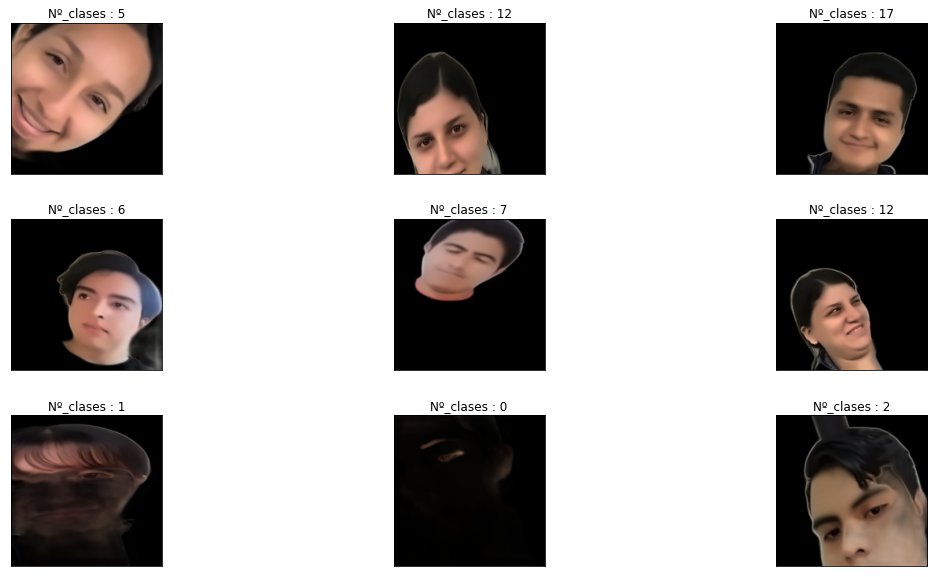

In [65]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Nº_clases : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
display_rand_images(images, labels)
    

In [66]:
#Preparar datos para entrenar el modelo CNN

#1-Reorganización de datos

#obtener números igualmente espaciados en un rango dado
n = np.arange(images.shape[0])
print("'n' antes del intercambio = ",n)

#todos los valores igualmente espaciados en la lista 'n'
np.random.seed(random_seed) #La función random. seed inicializa el generador de números aleatorios.
#La función shuffle() 'mezcla' o 
#cambia aleatoriamente el orden de los elementos de una lista antes de realizar la selección de alguno de ellos
np.random.shuffle(n)
print("\n'n' despues del intercambio = ",n)

'n' antes del intercambio =  [   0    1    2 ... 1422 1423 1424]

'n' despues del intercambio =  [1219 1010  512 ...  638  348  382]


In [67]:
#2-paso en el barajado de datos

##imágenes aleatorias y datos de etiquetas correspondientes en ambas listas
images = images[n]
labels = labels[n]

print("Antes del intercambio = ",images.shape,"\nDespues del intercambio = ",labels.shape)

Antes del intercambio =  (1425, 192, 192, 3) 
Despues del intercambio =  (1425,)


In [68]:
images = images.astype(np.float32) #Convertimos las imagenes a tipo flotante
labels = labels.astype(np.int32) #Las etiquetas en tipo de int
images = images/255 #Normalizamos
print("Forma de las imágenes después de la normalización = ",images.shape) #Comprabamos que todas tengas las mismas etquetas

Forma de las imágenes después de la normalización =  (1425, 192, 192, 3)


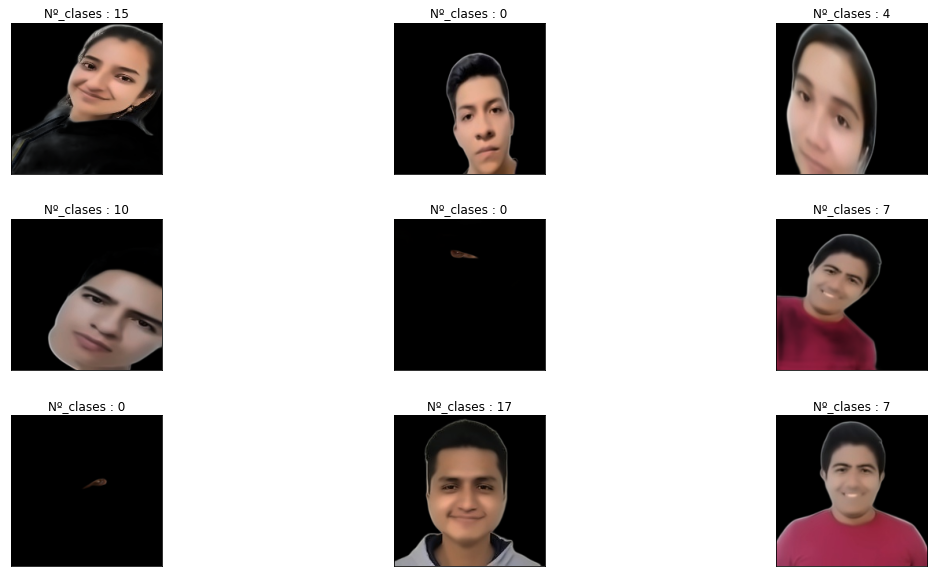

In [69]:
display_rand_images(images, labels)

# Dividir el Dataset

In [70]:
from sklearn.model_selection import train_test_split #permite dividir un dataset en dos bloques,

train_ds, test_ds, train_labels, test_labels =train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("train_ds  = ",train_ds.shape) #Mostramos el valor de entrenar
print("train_labels = ",train_labels.shape) #Mostramos las etiquetas de entramientos
print("\ntest_ds = ",test_ds.shape) #Los test de la imágen
print("test_labels= ",test_labels.shape) #Los test de labels

train_ds  =  (1140, 192, 192, 3)
train_labels =  (1140,)

test_ds =  (285, 192, 192, 3)
test_labels=  (285,)


# AlexNet

In [72]:
#CONVETIR LAS IMAGENES A LO QUE ALEXNET PIDE 
import tensorflow as tf
train_ds = tf.image.resize(train_ds, (227, 227))
test_ds = tf.image.resize(test_ds, (227, 227))

# SE DEFINE EL MODELO

In [73]:
from tensorflow.keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [74]:
#Conv2D = Aplica una convolución 2D sobre una señal de entrada compuesta por varios planos de entrada
#MaxPooling2D = tipo de capa que usa una red convolucional para reconocimiento de imágenes 
#Dense = Las capas Dense son la capas de cálculo de que conectan cada neurona en una capa con todas las salidas de la capa anterior.
#Flatten = La función Flatten agrega argumentos en el orden en que se incluyen en la fórmula.
#Dropout = El dropout se ha utilizado desde su concepción como un método de regularización de los modelos.

#Código que responde a la descripción anterior
#Instanciamos el modelo
model=Sequential()
#Primera capa convolucional
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))
# Primera capa max pool 
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
#Normalizacion batch
model.add(BatchNormalization())
#2 Segunda capa convolucional
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))
#2 Segunda  capa max pool 
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
#Normalizacion batch
model.add(BatchNormalization())
# Tercera capa convolucional
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
# Cuarta capa convolucional
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
#Quinta capa convolucional
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
#Tercers capa max pool 
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
#Normalizacion pro lote
model.add(BatchNormalization())
#Redimensionar el modelo AlexNet
model.add(Flatten())
#Primera capa de densidad
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))
#regularizar neuronas
model.add(Dropout(0.4))
#normalizacion por lote
model.add(BatchNormalization())
#Segunda capa de densidad
model.add(Dense(4096,activation="relu"))
#Regularizar neuronas
model.add(Dropout(0.4))
#normalizacion por lotes
model.add(BatchNormalization())
#Tercera capa de densidad
model.add(Dense(1000,activation="relu"))
#regularizar neuronas
model.add(Dropout(0.4))
#normalizacion por lote
model.add(BatchNormalization())
#capa de salida
model.add(Dense(20,activation="softmax"))
#resumen
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 batch_normalization_24 (Bat  (None, 27, 27, 96)       384       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 11, 11, 256)      0         
 g2D)                                                            
                                                      

In [75]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
%%time
model.fit(train_ds, train_labels,  epochs=200) #Uso del método fit para los valores de entramiento

In [ ]:
loss, accuracy = model.evaluate(test_ds, test_labels) #Perdida y precisión, en la imágen de test y las etquetas de test
print(loss,accuracy) #Mostramos la perdidad y la precisión

In [ ]:
# PREDECIMOS
pred = model.predict(test_ds) #Instanciamos la clase model.predict y mandamos por parametro el test
pred.shape #mostramos la prediccion

In [ ]:
# Definir el tamaño de las figuras
plt.figure(1 , figsize = (19 , 10))
# Definimos un contador
n = 0 
# Bucle para mostrar las imagenes
for i in range(9):
    # Incrementamos el contador
    n += 1 
    # Obtenemos una imagen aleatoria
    r = np.random.randint( 0, test_ds.shape[0], 1)
    # Establecemos la forma de presentar las imagenes
    plt.subplot(3 , 3 , n)
    # Ajustamos la forma de mostrar las imagenes
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    # obtenemos la imagen actual para mostrar
    plt.imshow(test_ds[r[0]])
    # Asignamos las etiquetas
    plt.title(class_names[test_labels[r[0]]]) 
    # Establecemos la medida x, y
    plt.xticks([]) , plt.yticks([])

# Mostramos la gráfica
plt.show()